In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import scipy.integrate as integrate

import math

import Lava as Lava

### <b> Comparison of upper surface cooling and crustal growth between Earth and Venus </b>

In [2]:
## read in data from Flynn and Mouginins-Mark 1992
data = pd.read_csv("FlynnMougnisMark_Puuoo.csv")

t_data = data.Seconds.to_numpy()
T_data = data.Tc.to_numpy()

In [3]:
Tlava = 1135 + 273
Ta_venus = 737 
Ta_earth = 30 + 273
Tsub_venus = Ta_venus
Tsub_earth = Ta_earth

## Thermal parameters
L = 3.2e5                 ## latent heat of fusion in J/kg; value from Wittmann et al.2017
k = 1
kappa = 5e-7

## Predefined set of lambdasfor solcing the transcendental Stefan problem
lambdas = np.arange(1.5, 0, -1e-5)

In [4]:
## Earth
Trange = np.arange(Tlava, Ta_earth, -5)

trange_earth = np.zeros_like(Trange, dtype = np.float32)
trange_venus_noconv = np.zeros((2, len(Trange)), dtype = np.float32)
trange_venus_snyder = np.zeros_like(Trange, dtype = np.float32)

upper_crust_earth = np.zeros_like(Trange, dtype = np.float32)
upper_crust_venus_noconv = np.zeros((2, len(Trange)), dtype = np.float32)
upper_crust_venus_snyder = np.zeros_like(Trange, dtype = np.float32)

In [5]:
l_final = 0
for i, T in enumerate(Trange):
    
    if Trange[i]==Tlava:
        trange_earth[i] = 0
        trange_venus_noconv[0,i] = 0
        trange_venus_noconv[1,i] = 0
        trange_venus_snyder[i] = 0
        
    else:
        ## Solving the Stefan problem to get lambda
        c = Lava.heat_capacity(T)
        rho = Lava.density(T)
        kappa = 1 / rho / c
        RHS = L * np.pi ** 0.5 / c / (Tlava - T)


        l = lambdas[np.argmin(np.abs(RHS - Lava.Stefan_lambda_upper_crust(lambdas)))]  


        ## Compute time at which surface temperature T is reached for Earth
        emis = 0.95
        Qrad = Lava.Radiation_flux(T, Ta_earth, emis)

        hconv = 50
        Qconv = Lava.Convection_flux(T, Ta_earth, hconv)

        t_sqroot = k * (Tlava - T) / erf(l) / (np.pi*kappa)**0.5 / (Qrad + Qconv)
        trange_earth[i] = t_sqroot**2
        upper_crust_earth[i] = Lava.crust_thickness(l, kappa, trange_earth[i])

        if T >= Ta_venus:
            ## Compute time at which surface temperature T is reached for Venus

            ## Mueller method
            emis = 0.95
            Qrad = Lava.Radiation_flux(T, Ta_venus, emis)
            Qconv1 = Lava.Convection_flux(T, Ta_venus, 1e-5)
            Qconv2 = Lava.Convection_flux(T, Ta_venus, 208)

            t_sqroot = k * (Tlava - T) / erf(l) / (np.pi*kappa)**0.5 / (Qrad + Qconv1)
            trange_venus_noconv[0,i] = t_sqroot**2
            upper_crust_venus_noconv[0, i] = Lava.crust_thickness(l, kappa, trange_venus_noconv[0,i] )
            t_sqroot = k * (Tlava - T) / erf(l) / (np.pi*kappa)**0.5 / (Qrad + Qconv2)
            trange_venus_noconv[1,i] = t_sqroot**2
            upper_crust_venus_noconv[1, i] = Lava.crust_thickness(l, kappa, trange_venus_noconv[1,i] )


            ## Flynn method
            Q_snyder = 1.07 * 1e-13 * T**4.85 * 1000                                                        ## heat flux in W/m2 using eq 8 of Flynn et al. 2023
            t_sqroot = k * (Tlava - T) / erf(l) / (np.pi*kappa)**0.5 / Q_snyder
            trange_venus_snyder[i] = t_sqroot**2
            upper_crust_venus_snyder[i] = Lava.crust_thickness(l, kappa, trange_venus_snyder[i] )
            
            l_final = l

            
        elif T < Ta_venus:
            trange_venus_noconv[0,i] = np.nan
            trange_venus_noconv[1,i] = np.nan
            trange_venus_snyder[i] = np.nan

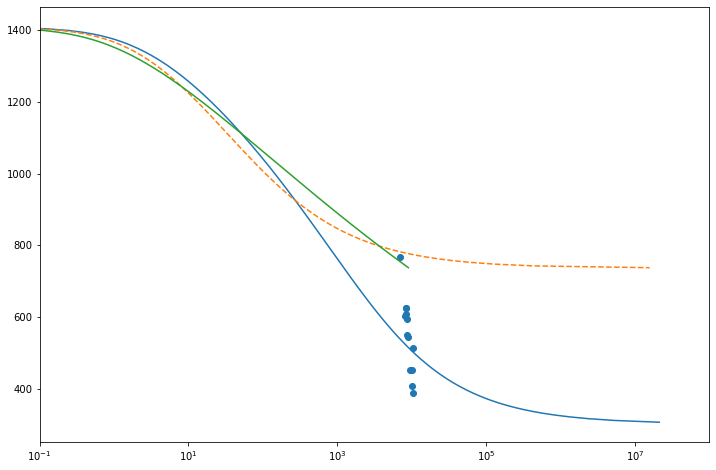

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12, 8)

ax.plot(trange_earth, Trange)
# ax.plot(trange_venus_noconv[0], Trange, '--')
ax.plot(trange_venus_noconv[1], Trange, '--')
ax.plot(trange_venus_snyder, Trange)
ax.scatter(t_data, T_data)
ax.semilogx()
ax.set_xlim(1e-1, 1e8)
plt.show()

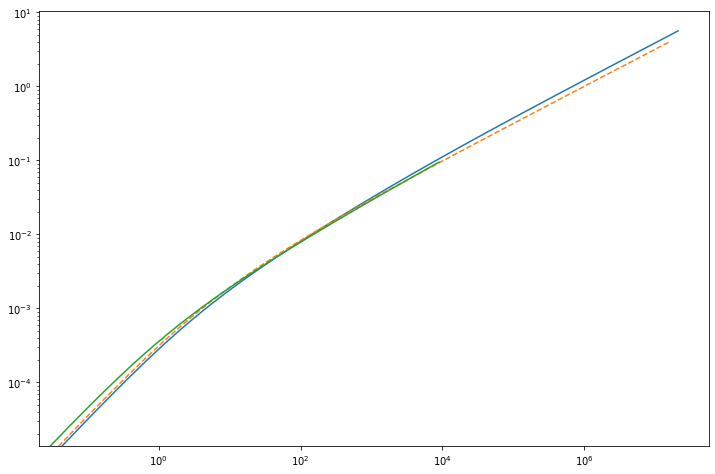

In [7]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12, 8)

ax.plot(trange_earth, upper_crust_earth)
# ax.plot(trange_venus_noconv[0], upper_crust_venus_noconv[0], '--')
ax.plot(trange_venus_noconv[1], upper_crust_venus_noconv[1], '--')
ax.plot(trange_venus_snyder, upper_crust_venus_snyder)
# ax.scatter(t_data, T_data)
ax.semilogx()
ax.semilogy()
# ax.set_xlim(1e-1, 1e8)
plt.show()

### <b> Lava flow CAS model for a 10 m thick and 60m thick flow on Earth and Venus </b>

In [22]:
lava_thickness = [10, 60]

Tlava = 1135 + 273
Ta_venus = 737 
Ta_earth = 30 + 273
Tsub_venus = Ta_venus
Tsub_earth = Ta_earth

## Thermal parameters
L = 3.2e5                 ## latent heat of fusion in J/kg; value from Wittmann et al.2017
k = 1
kappa = 5e-7

## Predefined set of lambdasfor solcing the transcendental Stefan problem
lambdas = np.arange(1.5, 0, -1e-5)

lava solidification occured at or before  1629.4195787014023  hours


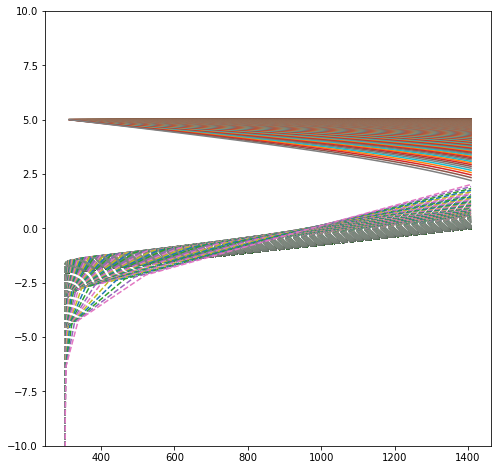

1629.4195787014023


In [3]:
## Case 1 - Venus 10 m
lt = lava_thickness[0]
zend = -100
dz = 1e-2
z = np.arange(zend, lt, dz)
dt = 10

Tsub = Tsub_earth
Ta = Ta_earth 

T_pre_eq = np.arange(Tlava-1, Tsub, -0.5)
t_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)
t_eq = 0
Cup_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)
Cbase_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)

T_up = np.zeros((len(T_pre_eq), ), dtype=np.float32)

t_surface_eq = 0
l_lower = 0
l_upper = 0

fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 8)

for i, T in enumerate(T_pre_eq):
    c = Lava.heat_capacity(T)
    rho = Lava.density(T)
    kappa = Lava.diffusivity(1, rho, c)
    
    ################### Computation of lambda ###########################################
    # Upper crust
    RHS = L * np.pi ** 0.5 / c / (Tlava - T)
    l_up = lambdas[np.argmin(np.abs(RHS - Lava.Stefan_lambda_upper_crust(lambdas)))] 
    # Lower crust
    RHS_lower = L * np.pi ** 0.5 / c / (Tlava - Tsub)         
    l_base = lambdas[np.argmin(np.abs(RHS - Lava.Stefan_lambda_basal_crust(lambdas)))] 
    
    
    ################### Computation of fluxes and time ###################################
#     Qsnyder = Lava.Snyder_flux(T)
    Qrad = Lava.Radiation_flux(T, Ta)
    Qconv = Lava.Convection_flux(T, Ta)
#     Q = Qsnyder
    Q = Qrad + Qconv
    t = Lava.getTime(T, Tlava, Q, l_up, k, kappa)
    t_pre_eq[i] = t
    t_eq = t
    
    ################### Computation of fluxes and time ###################################
    Cbase_pre_eq[i] = Lava.crust_thickness(l_base, kappa, t)
    Cup_pre_eq[i] = Lava.crust_thickness(l_up, kappa, t)
   
    ################### Check if the lava hassolidified ##################################
    if Cup_pre_eq[i] + Cbase_pre_eq[i] >= lt:
        print("lava solidification occured at or before ", t/3600, " hours")
        break
        

    ################### Computtemperature profile in the basal crust #######################
    y_base = np.linspace(zend, Cbase_pre_eq[i], 50)
    T_base = (((Tlava-Tsub) / (erf(l_base)+1)) * (1 + erf(y_base / 2/ (kappa*t)**0.5))) + Tsub
       
    ################### Computtemperature profile in the upper crust #######################
    y_up = np.linspace(0, Cup_pre_eq[i], 50)
    T_up = (((Tlava-T) / erf(l_up)) * erf((y_up) / 2/(kappa*t)**0.5)) + T

    

    ax.plot(T_base, y_base, "--")
    ax.plot(T_up, lt-y_up)
    
    
    

    
plt.ylim(-10, lt+5)
plt.show()
print(t_eq/3600)

In [27]:
### trying a differnet algorithm

## Case 1 - Venus 10 m
lt = lava_thickness[1]
zend = -100
dz = 1e-2
z = np.arange(zend, lt, dz)
dt = 10

Tsub = Tsub_venus
Ta = Ta_venus 

T_pre_eq = np.arange(Tlava-1, Tsub, -0.5)
t_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)
l_up_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)
l_base_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)

t_eq = 0.0

t_solid_near = 0.0
t_solid = 0.0

C_up_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)
C_base_pre_eq = np.zeros_like(T_pre_eq, dtype = np.float32)

T_up = np.zeros((len(T_pre_eq), ), dtype=np.float32)


for i, T in enumerate(T_pre_eq):
    c = Lava.heat_capacity(T)
    rho = Lava.density(T)
#     kappa = Lava.diffusivity(1, rho, c)
    
    ################### Computation of lambda ###########################################
    # Upper crust
    RHS = L * np.pi ** 0.5 / c / (Tlava - T)
    l_up_pre_eq[i] = lambdas[np.argmin(np.abs(RHS - Lava.Stefan_lambda_upper_crust(lambdas)))] 
    # Lower crust
    RHS_lower = L * np.pi ** 0.5 / c / (Tlava - Tsub)         
    l_base_pre_eq[i] = lambdas[np.argmin(np.abs(RHS - Lava.Stefan_lambda_basal_crust(lambdas)))] 
    
    
    ################### Computation of fluxes and time ###################################
    Qsnyder = Lava.Snyder_flux(T)
#     Qrad = Lava.Radiation_flux(T, Ta)
#     Qconv = Lava.Convection_flux(T, Ta)
    Q = Qsnyder
#     Q = Qrad + Qconv
    t = Lava.getTime(T, Tlava, Q, l_up_pre_eq[i], k, kappa)
    t_pre_eq[i] = t
    t_eq = t
    
    ################### Computation of fluxes and time ###################################
    C_base_pre_eq[i] = Lava.crust_thickness(l_base_pre_eq[i], kappa, t)
    C_up_pre_eq[i] = Lava.crust_thickness(l_up_pre_eq[i], kappa, t)
    

   
    ################### Check if the lava has solidified ##################################
    if C_up_pre_eq[i] + C_base_pre_eq[i] >= lt:
        if t_solid_near == 0.0:
            t_solid_near = t
            T_solid_near = T
            print("lava solidification occured at or before ", t/3600, " hours")

In [28]:
## Find time of solidification if lava has already solidified
delt = 10

if t_solid_near != 0.0:
    print("Lava has alrteady solidified. Finding time of solidification....")
    idx = np.where(t_pre_eq == t_solid_near)[0][0]
    tstart = t_pre_eq[idx-1]
    tstop = t_pre_eq[idx]
    Tsurf_solid = T_pre_eq[idx]
    
    interval = np.arange(tstart, tstop+delt, delt) 
    
    l_up_start = l_up_pre_eq[idx-1]
    l_up_stop = l_up_pre_eq[idx]
    del_l_up = (l_up_start - l_up_stop) / len(interval)
    
    l_base_start = l_base_pre_eq[idx-1]
    l_base_stop = l_base_pre_eq[idx]
    del_l_base = (l_base_start - l_base_stop) / len(interval)
    
    for i in range(len(interval)):
        t = interval[i]
        l_up = l_up_start + i*del_l_up
        l_base = l_base_start + i*del_l_base
        
        C_base= Lava.crust_thickness(l_base, kappa, interval[i])
        C_up = Lava.crust_thickness(l_up, kappa, interval[i])       
        if C_up + C_base >= lt:
            print("Total crust thickness of ", C_up + C_base, " m was attained at time t = ", t_solid, " s")
            break  
            
        C_base_solid = C_base
        C_up_solid = C_up
        l_up_solid = l_up
        l_base_solid = l_base
        t_solid = interval[i]

elif t_solid_near == 0.0:
    print("Lava still not completely solid. Running forward in time to find point of solidification")
    l_up = l_up_pre_eq[-1]
    l_base = l_base_pre_eq[-1]
    l_up_solid = l_up
    l_base_solid = l_base
    Tsurf_solid = Ta
    
    
    t_post_eq = np.arange(t_eq+10, t_eq + 10*3.1536e7, 10)
    C_up_post_eq = np.zeros_like(t_post_eq, dtype = np.float32)
    C_base_post_eq = np.zeros_like(t_post_eq, dtype = np.float32)
    
    for i in range(len(t_post_eq)):
        C_base_post_eq[i] = Lava.crust_thickness(l_base, kappa, t_post_eq[i])
        C_up_post_eq[i] = Lava.crust_thickness(l_up, kappa, t_post_eq[i])
        
        if C_base_post_eq[i] + C_up_post_eq[i] >= lt:
            print("Total crust thickness of ", C_base_post_eq[i] + C_up_post_eq[i], " m was attained at time t = ", t_solid, " s")
            break   
            
        C_base_solid = C_base_post_eq[i]
        C_up_solid = C_up_post_eq[i]
        t_solid = t_post_eq[i]

Lava still not completely solid. Running forward in time to find point of solidification


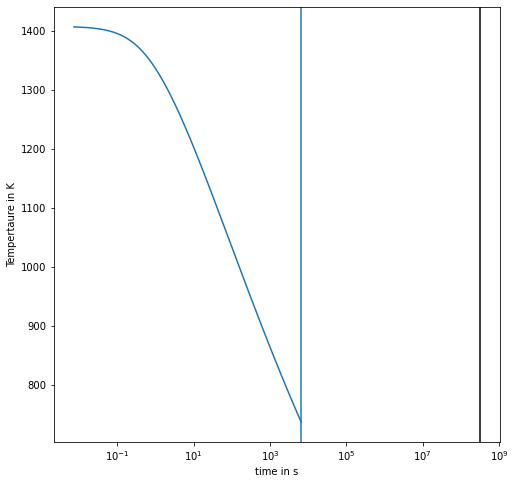

In [29]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 8)

ax.plot(t_pre_eq, T_pre_eq)
ax.axvline(t_eq)
ax.axvline(t_solid_near, color = 'k', linestyle='--')
ax.axvline(t_solid, color = 'k')
ax.semilogx()

ax.set_xlabel("time in s")
ax.set_ylabel("Tempertaure in K")
plt.show()

In [30]:
print(t_solid / 3600)

87601.83257558336


In [10]:
# Temperature profiles of interest since eruption: 1 hour, 1 day, 1 week, 1 month, 1 year, 5 years, 10 years, and time of solidifcation
times = [3600, 24*3600, 7*24*3600, 90*24*3600, 365*24*3600, 5*365*24*3600, 10*365*24*3600]
# times.sort()
times = np.array(times)
# times = np.array(times.sort())

In [11]:
try:
    t_lookup = np.concatenate((t_pre_eq, t_post_eq))
    C_base_lookup = np.concatenate((C_base_pre_eq, C_base_post_eq))
    C_up_lookup = np.concatenate((C_up_pre_eq, C_up_post_eq))
    l_up_lookup = np.concatenate((l_up_pre_eq, l_up_pre_eq[-1] * np.ones_like(t_post_eq)))
    l_base_lookup = np.concatenate((l_base_pre_eq, l_base_pre_eq[-1] * np.ones_like(t_post_eq)))
    Tsurf_lookup = np.concatenate((T_pre_eq, Ta * np.ones_like(t_post_eq)))
    print("solidification occured after surface equilibration")
except:
    t_lookup = t_pre_eq
    l_up_lookup = l_up_pre_eq
    l_base_lookup = l_base_pre_eq
    C_up_lookup = C_up_pre_eq
    C_base_lookup = C_base_pre_eq
    Tsurf_lookup = T_pre_eq
    print("solidification occured before surface equilibration")

presolid_idx = []
for i in range(len(times)):
    if times[i] <= t_solid:
        a = np.abs(times[i] - t_lookup).argmin()
        presolid_idx.append(a)

solidification occured after surface equilibration


0.06918674 0.047208954 777.0 737
0.3447073 0.23751447 737.0 737
0.9120221 0.6284127 737.0 737


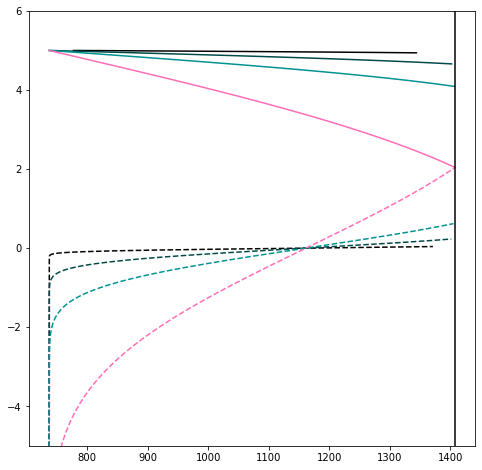

In [21]:
## Pre-solidification temperature calculation
fig, ax = plt.subplots(1,1)
fig.set_size_inches(8, 8)

colors = ["#000000","#004949","#009292","#ff6db6","#ffb6db",
 "#490092","#006ddb","#b66dff","#6db6ff","#b6dbff",
 "#920000","#924900","#db6d00","#24ff24","#ffff6d"]
color_idx = 0

zend = -100
dz = 1e-2
z = np.arange(zend, lt, dz)

for i in presolid_idx:
    t = t_lookup[i]
    C_up = C_up_lookup[i]
    C_base = C_base_lookup[i]
    Tsurf = Tsurf_lookup[i]
    print(C_up, C_base, Tsurf, Tsub)
    
    ################### Compute temperature profile in the basal crust #######################
    y_base = np.arange(-100, C_base, dz)
    T_base = (((Tlava-Tsub) / (erf(l_base)+1)) * (1 + erf(y_base / 2/ (kappa*t)**0.5))) + Tsub
    
    ################### Compute temperature profile in the upper crust #######################
    y_up = np.arange(0, C_up, dz)
    T_up = (((Tlava-Tsurf) / erf(l_up)) * erf((y_up) / 2/(kappa*t)**0.5)) + Tsurf 
    
    ax.plot(T_base, y_base, "--", color = colors[color_idx])
    ax.plot(T_up, lt-y_up, color = colors[color_idx])
    color_idx += 1
    
################### Compute temperature profile in the basal crust #######################
y_base_solid = np.arange(-100, C_base_solid, dz)
T_base_solid = (((Tlava-Tsub) / (erf(l_base_solid)+1)) * (1 + erf(y_base_solid / 2/ (kappa*t_solid)**0.5))) + Tsub

y_up_solid = np.arange(0, C_up_solid, dz)
T_up_solid = (((Tlava-Tsurf_solid) / erf(l_up_solid)) * erf((y_up_solid) / 2/(kappa*t_solid)**0.5)) + Tsurf_solid 

ax.plot(T_base_solid, y_base_solid, "--", color = colors[color_idx])
ax.plot(T_up_solid, lt-y_up_solid, color = colors[color_idx])
 
ax.axvline(Tlava, color='k')    
ax.set_ylim(-5, lt+1)

plt.show()

In [19]:
## Post-solidificatio temperature profile calculation

postsolid_times = times[times > t_solid]
print(postsolid_times)

z_range = np.arange(-100, lt+dz, dz)              ## delta_x in meters

dt = 10                                                    ## delta_t in seconds
time_total = 5*365*24*3600
# t_range = np.arange(time_solid, time_total+dt, dt).astype(np.float32)

## Initial_condition
t = t_solid
z = np.concatenate((y_base_solid, np.flip(lt-y_up_solid)), axis = 0)          ## join together lower crust z and upper crust z
T_n = np.concatenate((T_base_solid, np.flip(T_up_solid)), axis = 0)          ## join together lower crust T and upper crust T

## Note 1: Upper crust measuremnts are z downwards, so they need to be flipped 
## Note 2: The soldification point (z, T) are present in both the lower crust array and the upper crust array; removing the common (z, T) upper crust array.

m = 10
dprint = (time_total - t_solid) / m
printat = t_solid + dprint

T_PSC = np.zeros((m, len(z_range)), dtype=np.float32)

[ 31536000 157680000 315360000]


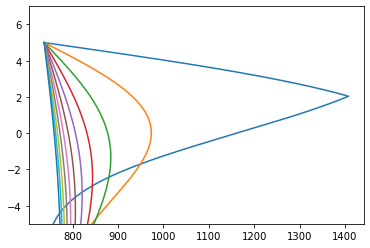

In [20]:
plt.figure()
plt.plot(T_n, z)

idx = 0
while t <= time_total:
    
    T_nplus = T_n + ( 
                    (kappa*dt/dz**2) * np.diff(T_n, n=2, prepend = T_n[0], append=T_n[-1]) 
                  )   
   
    t+=dt
    # check whether to store output
    if t >= printat:
        # print(idx)
        # print(t/3600/24)
        T_PSC[idx, :] = T_nplus
        printat += dprint
        idx += 1
        plt.plot(T_nplus, z)
        
    # Update boundary_conditions
    if T_n[-1] == Tsub:
        T_nplus[-1] = Tsub
        
    T_nplus[0] = Tsub
    
    
    # variables for next step
    T_n = T_nplus
    
    
plt.ylim(-5, lt + 2)
plt.show()   

In [16]:
1135+273

1408

3600.0 3596.975 0.0008402506510416667
86400.0 86534.45 -0.03734809027777778
604800.0 603789.06 0.2808159722222222
2592000.0 2605228.8 -3.6746527777777778
31536000.0 29094360.0 678.2333333333333
157680000.0 147438510.0 2844.8577777777778
315360000.0 262163140.0 14776.906666666666
22678724.0 23561462.0 -245.205
